## Housing Price Prediction of a US Based Company

In [134]:
#import all the required libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [135]:
# read the data
housing_data = pd.read_csv('train.csv', sep=',')

In [136]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Understanding and Exploration

In [137]:
housing_data.nunique(axis=0)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [138]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [140]:
housing_data.shape

(1460, 81)

In [141]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Cleanup

### Handling missing values 

In [143]:
# missing values imputation for categorical variables
missing_vals_col= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing_data[missing_vals_col]= housing_data[missing_vals_col].fillna('Not Present')


In [144]:
# selecting numeric columns from the dataset
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [145]:
housing_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [146]:
# normalizing GarageYrBlt column by GarageType column 
housing_data[housing_data.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

Not Present    1.0
Name: GarageType, dtype: float64

In [147]:
housing_data['MSSubClass']= housing_data['MSSubClass'].astype('object')

/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

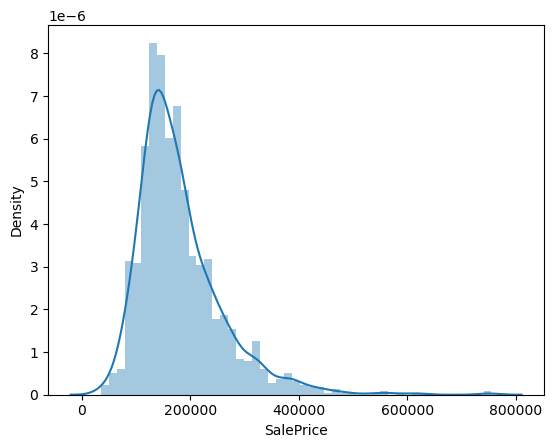

In [148]:
# display the distribution of the target variable
sns.distplot(housing_data['SalePrice'])

In [149]:
# select numeric columns from the dataset
housing_data_numeric = housing_data[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']]
housing_data_numeric.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea
0,1710,548,856,856,8,2003,2003,196.0,706,65.0,0,854,61,8450
1,1262,460,1262,1262,6,1976,1976,0.0,978,80.0,298,0,0,9600
2,1786,608,920,920,6,2001,2002,162.0,486,68.0,0,866,42,11250
3,1717,642,756,961,7,1915,1970,0.0,216,60.0,0,756,35,9550
4,2198,836,1145,1145,9,2000,2000,350.0,655,84.0,192,1053,84,14260


In [150]:
def plot_outlier(data, columns):
    num_columns = len(columns)
    grid_cols = 3
    num_rows = (num_columns + grid_cols - 1) // grid_cols

    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, 5*num_rows))
    fig.tight_layout(pad=3.0)

    for i, column in enumerate(columns):
        ax = axs[i // grid_cols, i % grid_cols]
        ax.boxplot(data[column])
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]
        
        ax.plot(data[column], 'ro', markersize=3) 
        ax.set_title(column)
        ax.set_ylabel(column)

    plt.show()

    return data
        

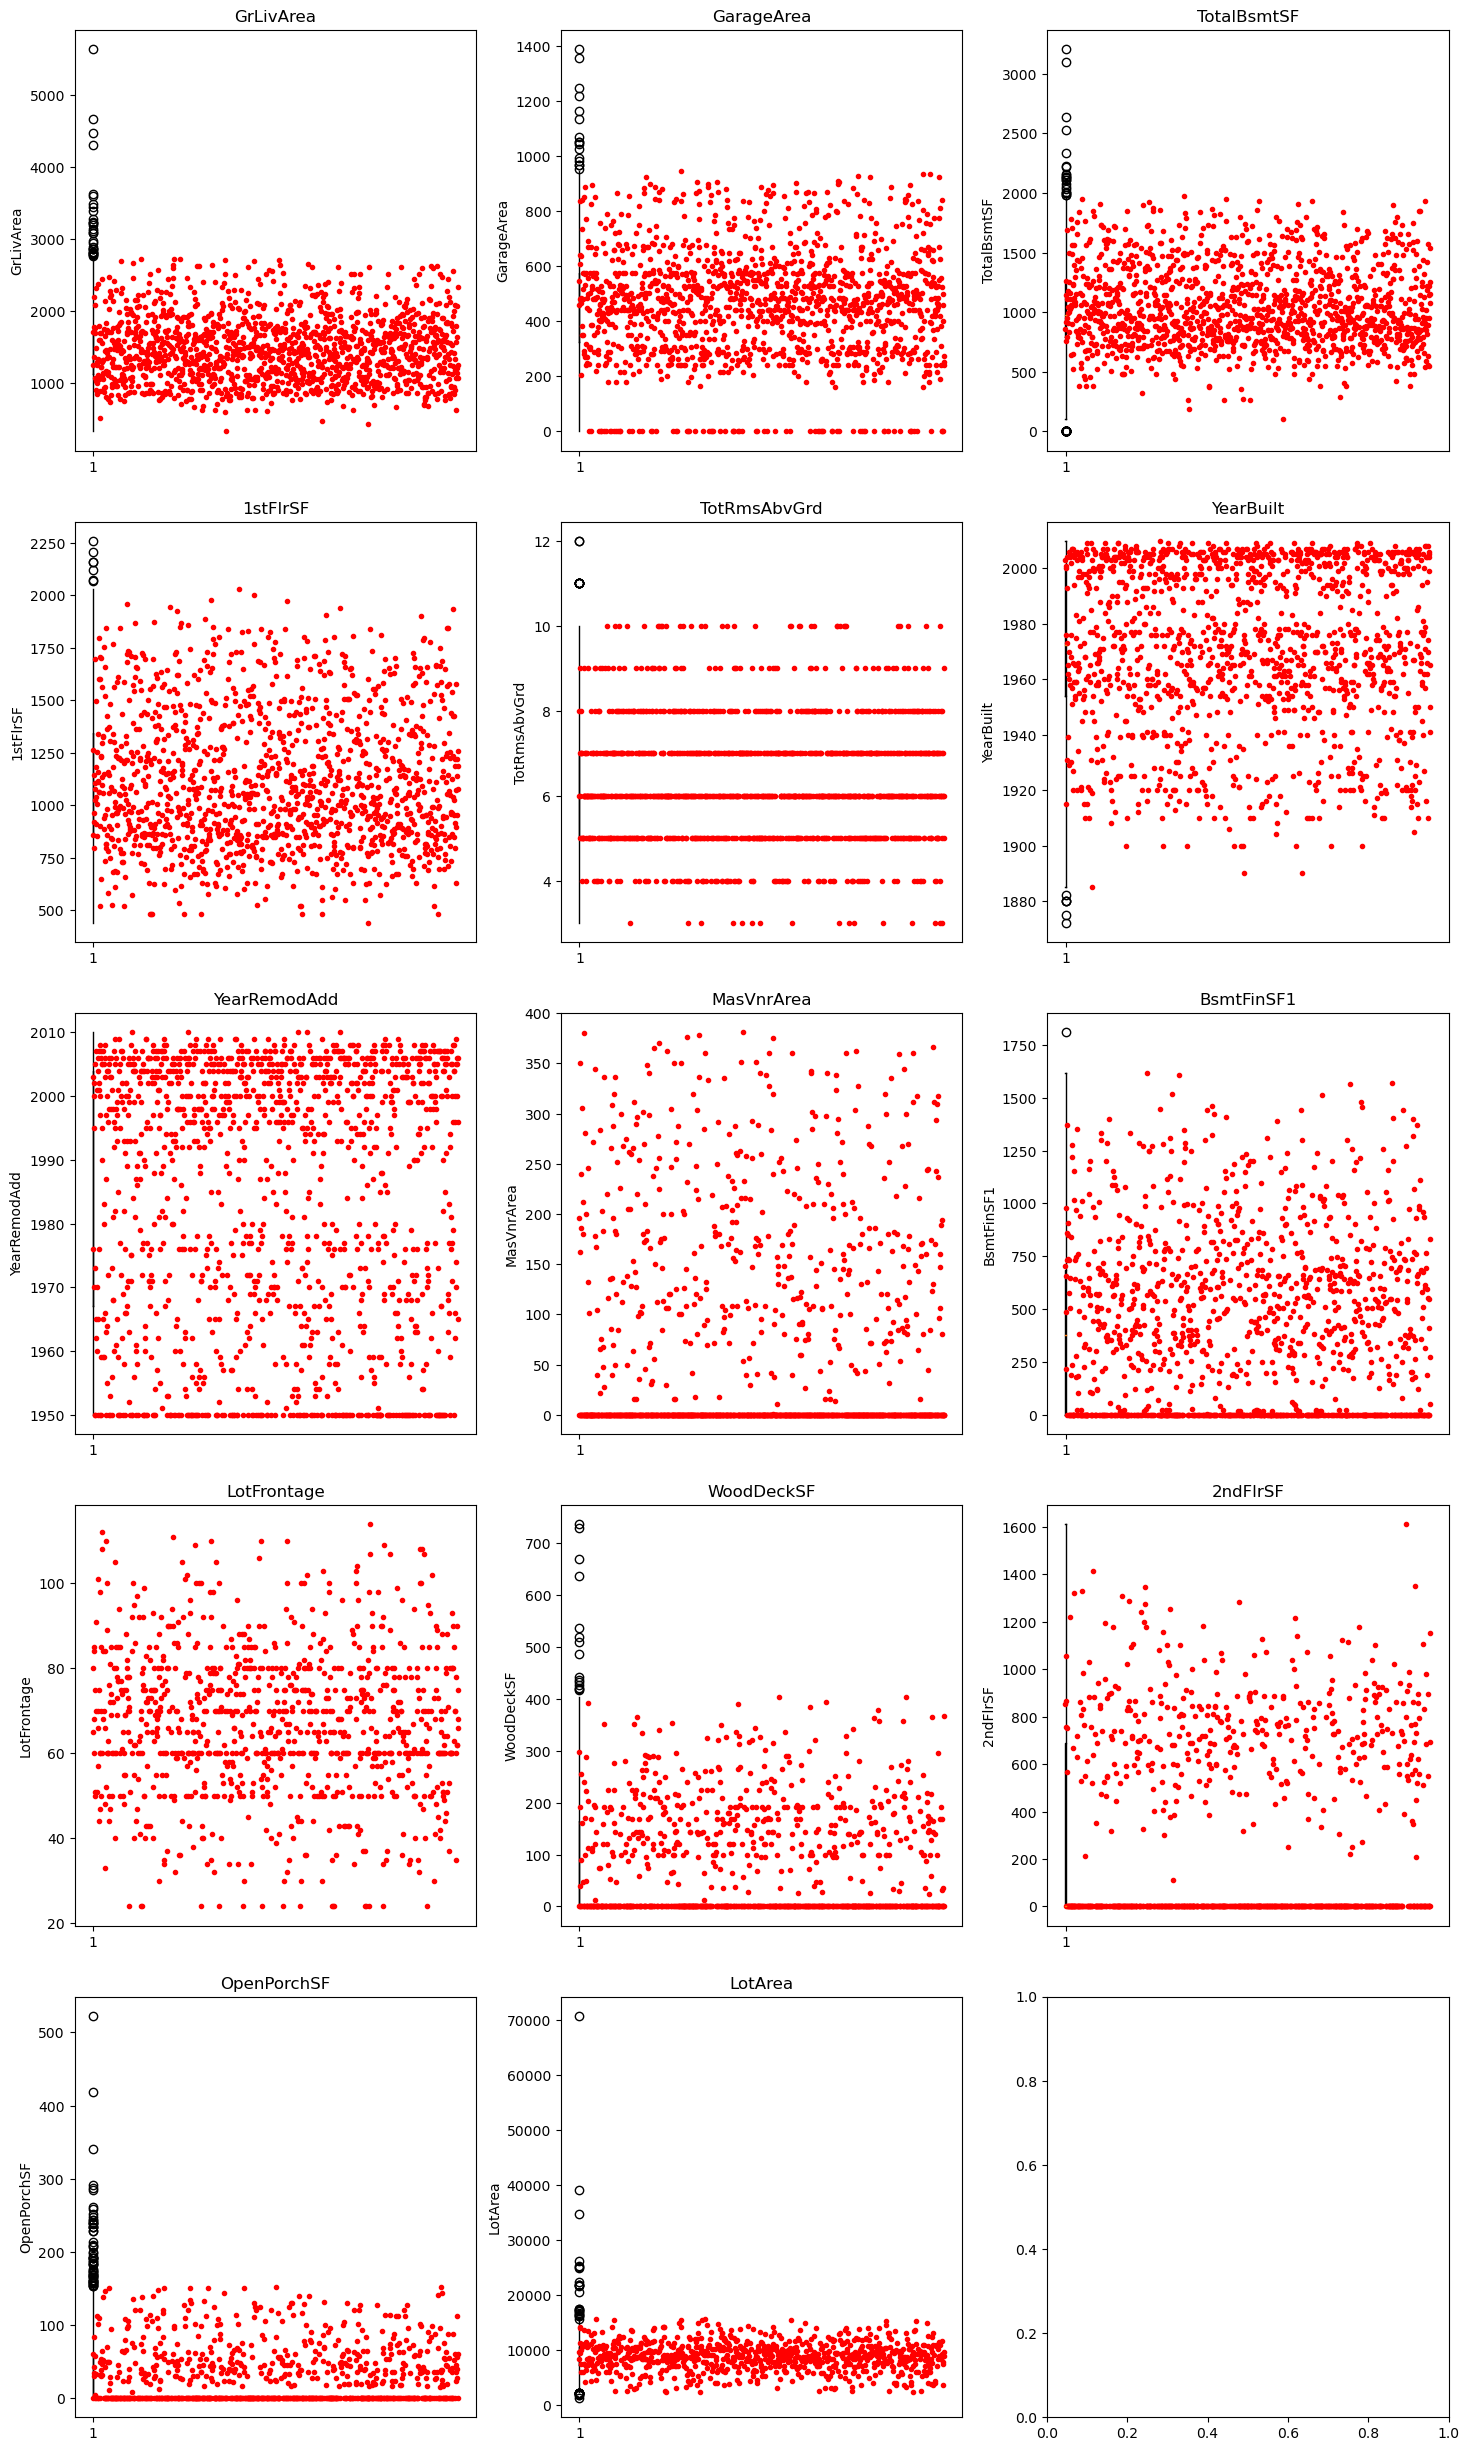

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea
0,1710,548,856,856,8,2003,2003,196.0,706,65.0,0,854,61,8450
1,1262,460,1262,1262,6,1976,1976,0.0,978,80.0,298,0,0,9600
2,1786,608,920,920,6,2001,2002,162.0,486,68.0,0,866,42,11250
3,1717,642,756,961,7,1915,1970,0.0,216,60.0,0,756,35,9550
4,2198,836,1145,1145,9,2000,2000,350.0,655,84.0,192,1053,84,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1072,525,547,1072,5,2005,2005,80.0,547,35.0,0,0,28,3675
1454,1221,400,1221,1221,6,2004,2005,0.0,410,62.0,0,0,113,7500
1455,1647,460,953,953,7,1999,2000,0.0,0,62.0,0,694,40,7917
1457,2340,252,1152,1188,9,1941,2006,0.0,275,66.0,0,1152,60,9042


In [151]:
# plot_outlier function is used to plot the outliers in the dataset
plot_outlier(housing_data_numeric, ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'])

In [152]:
housing_data_numeric.columns

Index(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea'],
      dtype='object')

### Visualizing Numeric Variables

KeyboardInterrupt: 

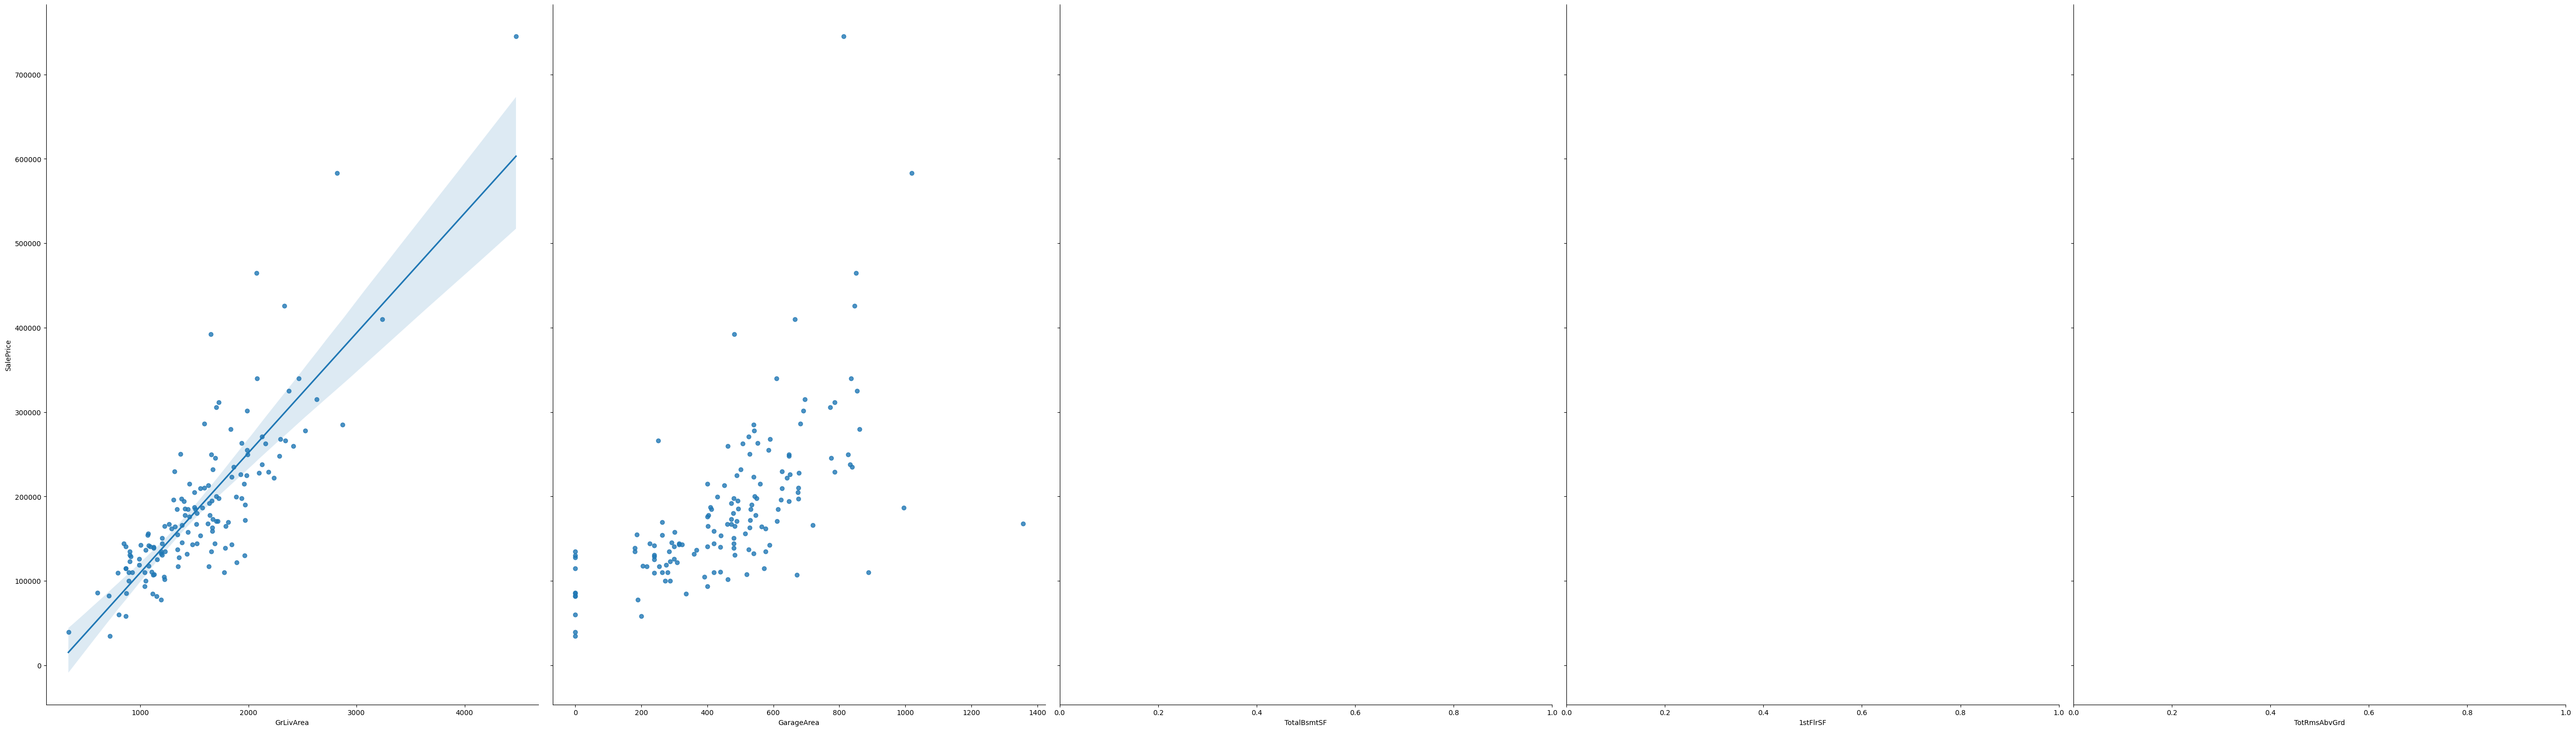

In [212]:
# Plotting numeric variables against SalePrice
frac = 0.10
sns.pairplot(housing_data.sample(frac=frac), x_vars=['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')
sns.pairplot(housing_data.sample(frac=frac), x_vars=['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')
sns.pairplot(housing_data.sample(frac=frac), x_vars=['WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea'], y_vars='SalePrice', height=15, aspect=0.7, kind='reg')

plt.show()

### Visualizing Categorical variables

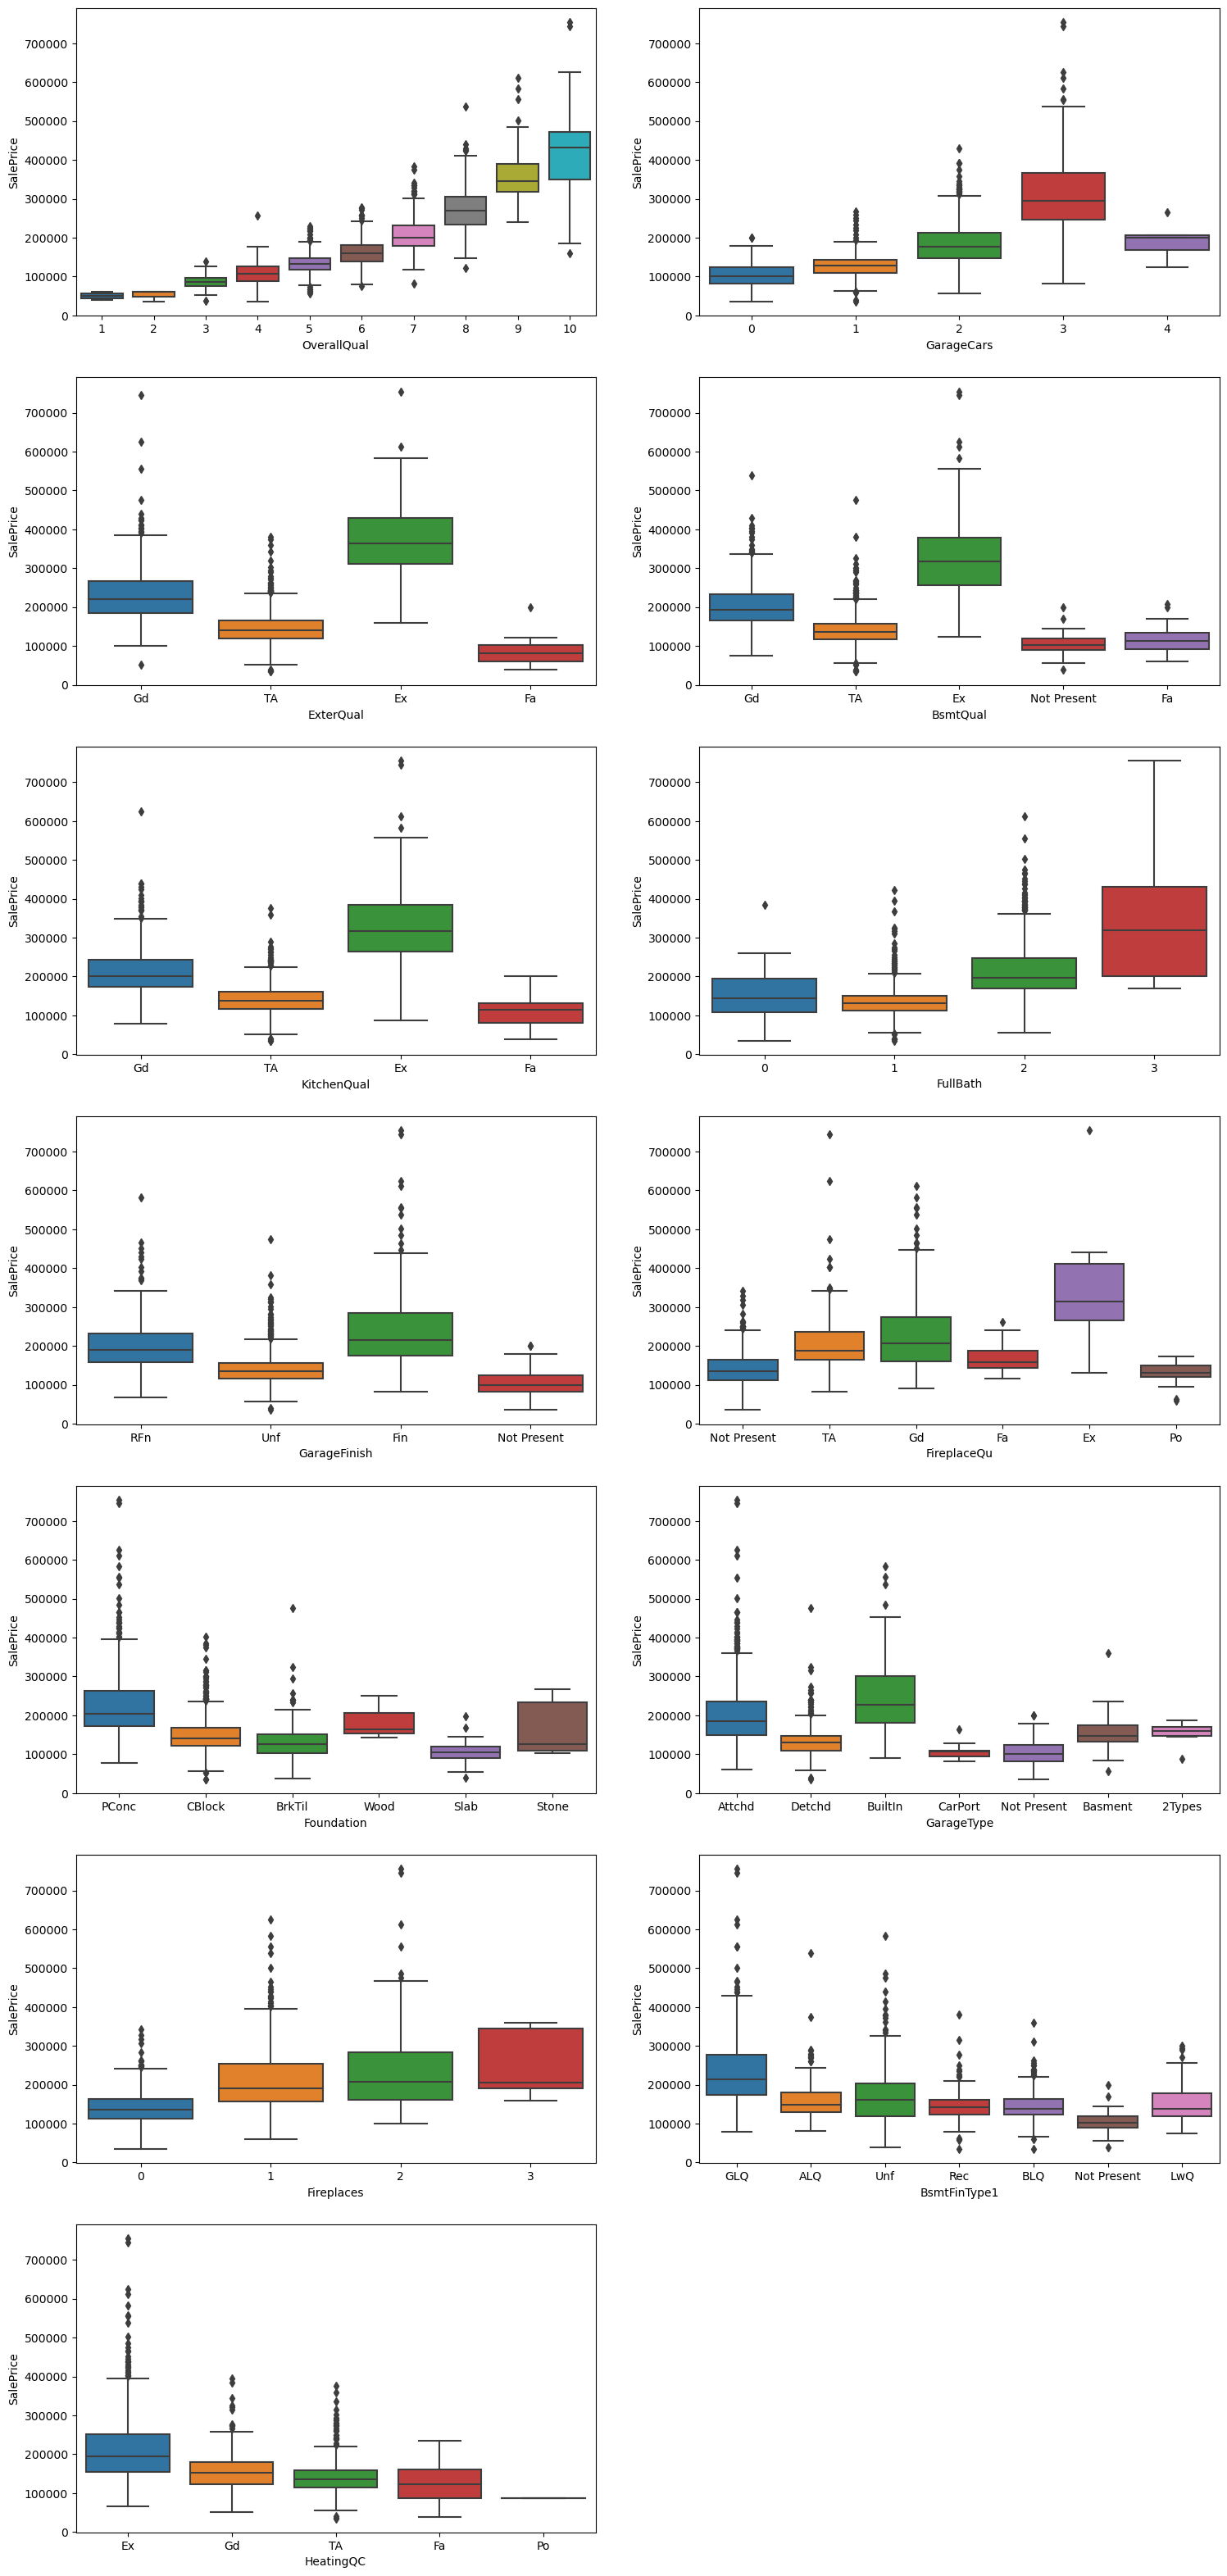

In [153]:
# plotting boxplots for categorical variables
cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']
plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    x_label= f'{col}'
    fig= sns.boxplot(data= housing_data, x= col, y= 'SalePrice')
plt.show()

Plotting correaliation heatmap

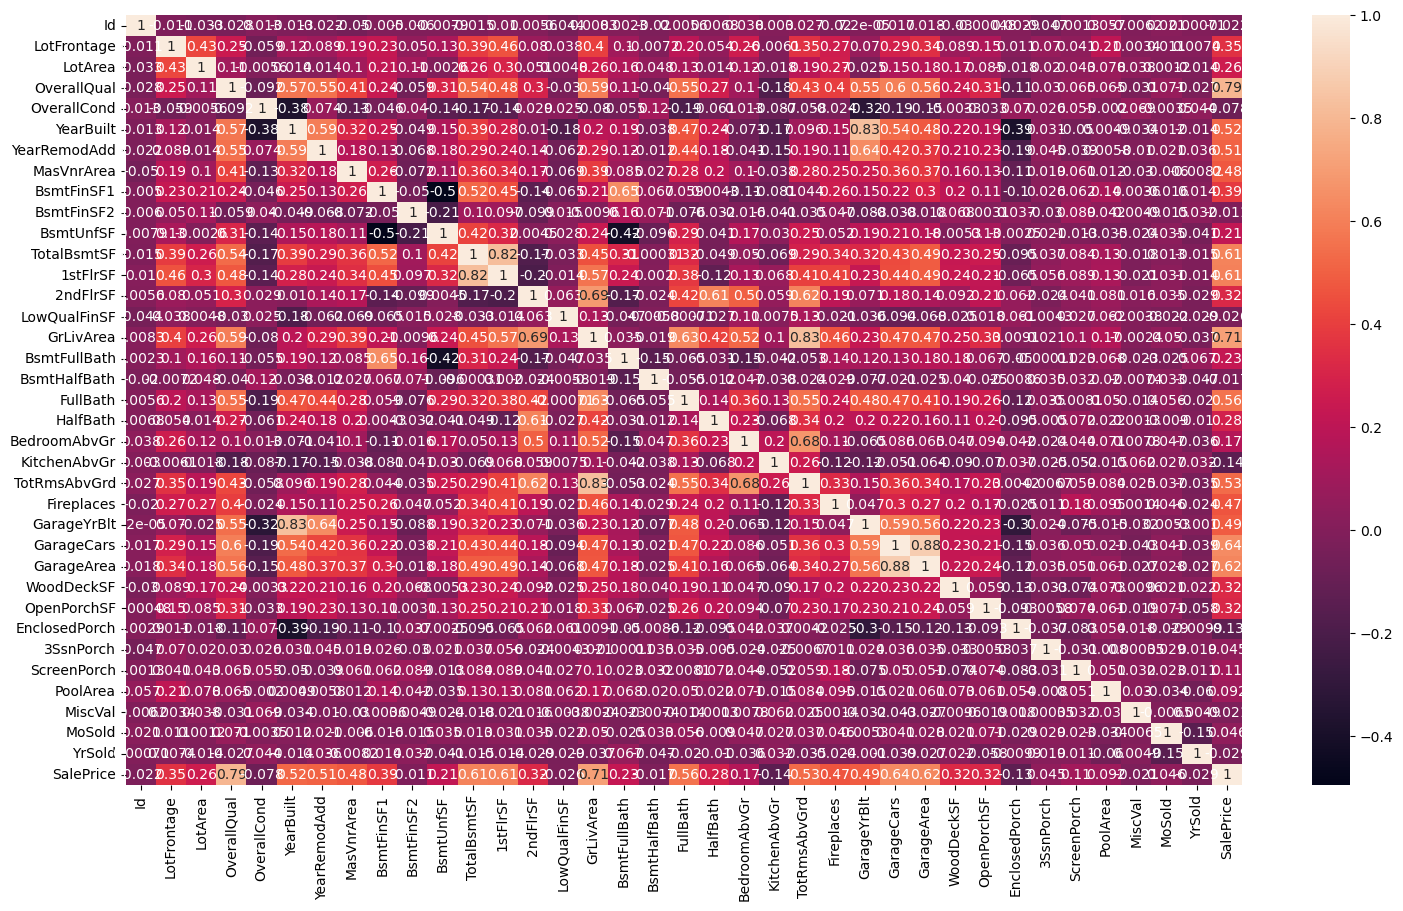

In [154]:
cor = housing_data.corr()

plt.figure(figsize=(18,10))

sns.heatmap(cor, annot=True)
plt.show()

In [155]:
# The correlation coefficients for the characteristics below are extremely high., dropping them from the dataset.
housing_data.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing_data.shape

(1460, 79)

In [156]:
# removing Id column because it is not required for prediction
housing_data.drop(['Id'], axis=1, inplace= True)
housing_data.shape

(1460, 78)

In [158]:
# filling missing values
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(), inplace= True)
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(), inplace= True)

In [159]:
# filling missing values
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(), inplace= True)
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(), inplace= True)

In [160]:
housing_cat= housing_data.select_dtypes(include= 'object')
housing_num= housing_data.select_dtypes(exclude= 'object')
housing_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Not Present,Not Present,Not Present,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


#### Getting the Dummy Variables

In [161]:
housing_data['Street'] = housing_data['Street'].map(lambda x: 1 if x== 'Pave' else 0)
housing_data['Utilities'] = housing_data['Utilities'].map(lambda x: 1 if x== 'AllPub' else 0)
housing_data['CentralAir'] = housing_data['CentralAir'].map(lambda x: 1 if x== 'Y' else 0)

#### One Hot Encoding for the remaining columns

In [162]:
# Performing get_dummies
cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(housing_data[cat_cols], drop_first=True)

/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [163]:
# merging the dummy data with the original data
housing_data.drop(cat_cols, axis=1, inplace= True)
housing_data= pd.concat([housing_data, dummies], axis= 1)
housing_data.shape

(1460, 271)

In [164]:
# Extract the target variable 'SalePrice' into its own variable 'y'
y= housing_data['SalePrice']
# # Drop the 'SalePrice' column from the DataFrame 'housing_data' to create the feature matrix 'X'
X= housing_data.drop('SalePrice', axis= 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

##### - Get the training features 'X_train' by excluding 'SalePrice'.
##### - Get the target variable 'y_train' for the training set.
##### - Get the testing features 'X_test' by excluding 'SalePrice'.
##### - Get the target variable 'y_test' for the testing set.

In [165]:
X_train= housing_data.iloc[X_train.index, :].drop('SalePrice', axis= 1)
y_train= housing_data.iloc[X_train.index, :]['SalePrice']
X_test= housing_data.iloc[X_test.index, :].drop('SalePrice', axis= 1)
y_test= housing_data.iloc[X_test.index, :]['SalePrice']

This code applies RobustScaler to scale the numerical features in the training and testing sets, excluding 'SalePrice', to ensure they are on a similar scale

In [167]:
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [169]:
X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1452,-0.350515,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,...,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50
762,0.030928,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,...,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
932,0.154639,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,...,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25
435,-0.268041,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,...,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25
629,0.134021,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,...,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


In [170]:
X_train.shape

(1021, 270)

In [171]:
X_train.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1452,-0.350515,-0.255342,1,1,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,...,0,0,0,0,1,0,0,0,1,0
762,0.030928,-0.041372,1,1,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,...,0,0,0,0,0,0,0,0,1,0
932,0.154639,0.089208,1,1,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,...,0,0,0,0,1,0,0,0,1,0
435,-0.268041,0.045983,1,1,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,...,0,1,0,0,0,0,0,0,1,0
629,0.134021,-0.024995,1,1,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,...,0,0,0,0,1,0,0,0,1,0


In [172]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

#### Removing those columns which are near to zero

In [173]:
not_required_cols = ['Utilities', 'MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po', 'PoolQC_Fa',
       'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth']
X_train= X_train.drop(not_required_cols,axis=1)
X_test= X_test.drop(not_required_cols,axis=1)

In [174]:
X_train.shape

(1021, 226)

In [175]:
housing_data.shape

(1460, 271)

In [176]:
housing_data.drop(not_required_cols, axis=1, inplace=True)

In [177]:
missing_info= round(X_train.isna().sum() * 100/X_train.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

GarageYrBlt    5.29
dtype: float64

In [178]:
# filling missing values in GarageYrBlt with median
X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].median(), inplace= True)

In [179]:
missing_info= round(X_test.isna().sum() * 100/X_test.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

GarageYrBlt    6.15
dtype: float64

In [180]:
# filling missing values in GarageYrBlt with median
X_test['GarageYrBlt'].fillna(X_test['GarageYrBlt'].median(), inplace= True)

### Model Building Using Ridge and Lasso Regression

#### Ridge Regression

In [181]:
# defining the range of alpha values to test
range1= [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,12.0,14.0, 16.0, 18.0, 20,50,100,500,1000]
range2= [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]

In [214]:
# Using Ridge regression with hyperparameter tuning using GridSearchCV and cross-validation to find the best 'alpha' parameter based on the negative mean absolute error as the evaluation metric.
params_ridge_1 = {'alpha': range1}

ridge = Ridge()

# cross validation
ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid = {'alpha': range1},
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
print(gcv_ridge.best_params_)
print(gcv_ridge.best_estimator_)
print(gcv_ridge.best_score_)

{'alpha': 10.0}
Ridge(alpha=10.0, random_state=42)
-22656.556597779305


##### Selected Alpha Value is 12

In [216]:
cv_results = pd.DataFrame(gcv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.029184,0.001003,0.004194,0.002279,0.0001,{'alpha': 0.0001},-26701.632822,-29390.926115,-27965.002809,-28019.187248,1098.567725,26,-15029.655267,-14996.423823,-16122.604966,-15382.894685,523.230068
1,0.029967,0.000069,0.004600,0.002212,0.001,{'alpha': 0.001},-26574.390134,-29331.736385,-26302.043166,-27402.723228,1368.542299,25,-15016.882596,-14995.209461,-16451.159977,-15487.750678,681.290706
2,0.020637,0.009810,0.003555,0.001078,0.01,{'alpha': 0.01},-25888.199915,-28862.151219,-23373.407563,-26041.252899,2243.382215,24,-15054.063233,-14993.623812,-18334.781716,-16127.489587,1560.986256
3,0.005660,0.000264,0.001795,0.000238,0.2,{'alpha': 0.2},-25323.137326,-26876.330986,-22606.064334,-24935.177549,1764.781178,22,-16031.790153,-15028.487245,-19577.240337,-16879.172579,1951.295536
4,0.005947,0.000259,0.002056,0.000557,0.3,{'alpha': 0.3},-25165.313688,-26548.989817,-22458.672928,-24724.325478,1698.730117,21,-16144.702445,-15055.322950,-19603.441648,-16934.489014,1938.928921
5,0.005547,0.000122,0.001678,0.000096,0.4,{'alpha': 0.4},-25012.872894,-26299.932401,-22356.664163,-24556.489819,1641.859765,20,-16217.832444,-15081.778240,-19612.606163,-16970.738949,1924.794633
6,0.005608,0.000104,0.001630,0.000023,0.5,{'alpha': 0.5},-24869.090154,-26096.158318,-22311.438762,-24425.562411,1576.613073,19,-16274.690989,-15108.824237,-19619.829594,-17001.114940,1911.903266
7,0.006459,0.000750,0.001860,0.000252,0.6,{'alpha': 0.6},-24736.792709,-25935.634825,-22263.181139,-24311.869557,1529.084428,18,-16321.049895,-15134.539211,-19629.671901,-17028.420336,1902.075039
8,0.005066,0.000193,0.001958,0.000330,0.7,{'alpha': 0.7},-24619.666299,-25800.586360,-22218.352887,-24212.868516,1490.461336,17,-16359.394935,-15162.158043,-19638.352336,-17053.301771,1892.125588
9,0.006045,0.000122,0.002696,0.001144,0.8,{'alpha': 0.8},-24514.658177,-25683.124402,-22175.005039,-24124.262539,1458.545379,15,-16393.790427,-15194.335859,-19647.021746,-17078.382677,1881.152628


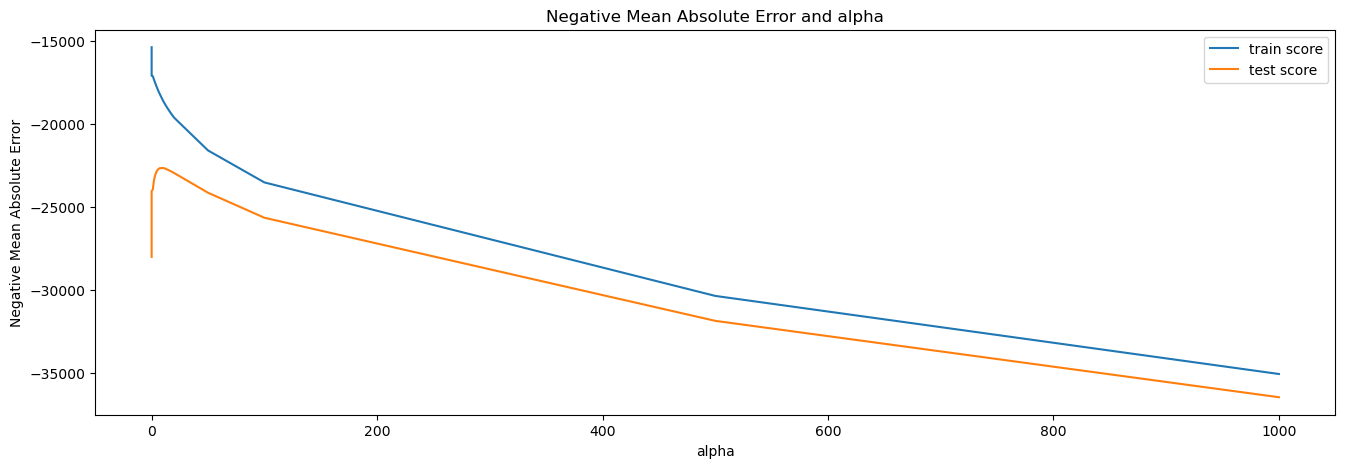

In [217]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting the training and testing scores (negative mean absolute error) for different alpha values used in Ridge regression after hyperparameter tuning with GridSearchCV.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [218]:
gcv_ridge= gcv_ridge.best_estimator_
gcv_ridge.fit(X_train, y_train)

Ridge(alpha=10.0, random_state=42)

In [219]:
alpha = 12.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=12.0)

In [220]:
y_train_pred = gcv_ridge.predict(X_train)
print("R2 Score on Training data ", round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred), 4))

R2 Score on Training data  0.8468


In [221]:
y_test_pred= gcv_ridge.predict(X_test)
print("R2 Score on Test data ", round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Test data  0.8354


## Lasso Regression

In [222]:
#  Lasso regression with hyperparameter tuning using GridSearchCV and cross-validation to find the best 'alpha' parameter based on the negative mean absolute error as the evaluation metric.
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= {'alpha': range1},
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train) 

Fitting 3 folds for each of 28 candidates, totalling 84 fits


/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+11, tolerance: 3.894e+08
  model = cd_fast.enet_coordinate_descent(
/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e+11, tolerance: 4.373e+08
  model = cd_fast.enet_coordinate_descent(
/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [223]:
print(lasso_gcv.best_params_)
print(lasso_gcv.best_estimator_)
print(lasso_gcv.best_score_)

{'alpha': 100}
Lasso(alpha=100, random_state=42)
-21920.349102457727


Selected Alpha value is 100

In [224]:
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=100, random_state=42)

In [225]:
y_train_pred = lasso_model.predict(X_train)
print("R2 Score on Training data ", round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred), 4))

R2 Score on Training data  0.8552


In [226]:
y_test_pred= lasso_model.predict(X_test)
print("R2 Score on Testing Data ", round( metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Testing Data  0.8417


In [227]:
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 105
Features present in Ridge: 199


In [228]:
lasso_model.intercept_

115107.00681567058

##### Top 25 features in Lasso model

In [229]:
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

2ndFlrSF                95481.724566
1stFlrSF                80415.093012
KitchenQual_TA         -42733.629085
RoofMatl_WdShngl        42357.731720
BsmtQual_TA            -37522.661529
Exterior2nd_ImStucc     36337.288446
KitchenQual_Gd         -36312.557952
LandContour_HLS         34854.690256
BsmtQual_Gd            -34251.597904
BsmtQual_Not Present   -32760.036512
KitchenQual_Fa         -29851.179608
LotShape_IR3           -28449.322888
Condition2_Norm         27577.164545
Exterior1st_BrkFace     25484.269857
BsmtQual_Fa            -24840.099550
HouseStyle_1.5Unf       22286.994169
BldgType_Twnhs         -20943.464214
BldgType_TwnhsE        -20189.441119
Functional_Typ          19374.809099
KitchenAbvGr           -18971.579615
MasVnrArea              18429.829692
HouseStyle_1Story       17914.040309
BsmtCond_TA             17343.797168
FullBath                16945.109328
YearBuilt               16916.942053
dtype: float64

### Conclusion

- Ridge and Lasso model both have given the almost the same accuracy, and it concludes that overfitting is not present.
- R2 Score of both the model on test dataset is 0.8713 and 0.8747 respectively.
- In Lasso regression the model has selected 105 features excluding 121 features
- Also from above we can see the top 25 features of Lasso regression.

### When the alpha value is Doubled

In [230]:
# doubled for ridge regression
ridge2= Ridge(alpha= 24, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=24, random_state=42)

In [231]:
y_test_pred= ridge2.predict(X_test)
print("R2 Score on Test data ", round(metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Test data  0.8256


In [232]:
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

2ndFlrSF           37547.373190
1stFlrSF           34918.761150
KitchenQual_TA    -25116.800019
BsmtQual_Gd       -23679.097514
FullBath           22910.396293
BsmtQual_TA       -22870.273300
KitchenQual_Gd    -19823.138282
MasVnrArea         19710.418577
ExterQual_TA      -18467.501213
LandContour_HLS    16671.326126
dtype: float64

In [233]:
# doubled for lasso regression
lasso2= Lasso(alpha= 200, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=200, random_state=42)

In [234]:
y_test_pred= lasso2.predict(X_test)
print("R2 Score on Testing Data ", round( metrics.r2_score(y_true=y_test, y_pred=y_test_pred), 4))

R2 Score on Testing Data  0.8401


In [201]:
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               80348.328534
OverallQual             62208.083011
Neighborhood_NoRidge    40186.705467
Neighborhood_StoneBr    36270.291415
Neighborhood_NridgHt    30515.423642
GarageArea              24480.735681
KitchenQual_TA         -21737.703502
BsmtQual_Gd            -20696.424417
KitchenQual_Gd         -20017.972141
Exterior1st_BrkFace     18750.130162
dtype: float64

<AxesSubplot:>

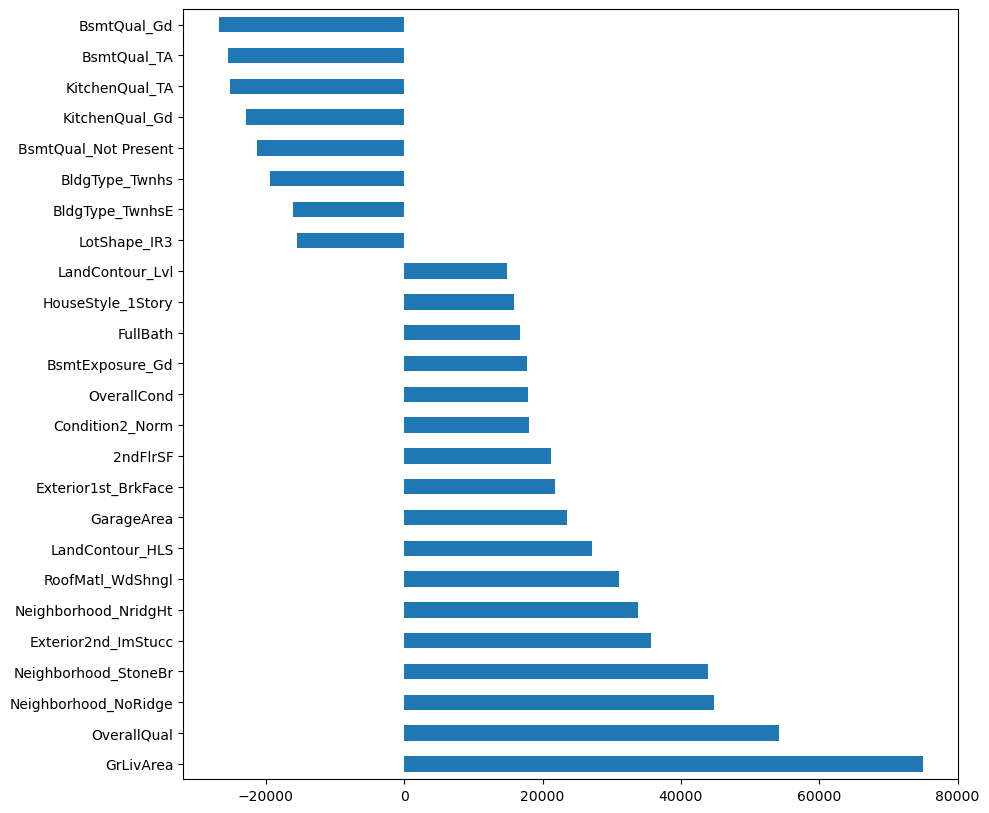

In [202]:
top25_features_lasso.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [203]:
# Top 5 features after doubling alpha in lasso regression
top25_features_lasso.nlargest()

GrLivArea               75008.500222
OverallQual             54144.120376
Neighborhood_NoRidge    44803.223499
Neighborhood_StoneBr    43976.574577
Exterior2nd_ImStucc     35744.995988
dtype: float64

In [204]:
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [205]:
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 199), (439, 199))

In [206]:
lasso3= Lasso(alpha= 100, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=100, random_state=42)

In [207]:
# Top 5 features of previous lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

2ndFlrSF            95481.724566
1stFlrSF            80415.093012
KitchenQual_TA     -42733.629085
RoofMatl_WdShngl    42357.731720
BsmtQual_TA        -37522.661529
dtype: float64